# Problem set 1 - Thomas Vandal

In [1]:
# all imports for the problem set
import numpy as np
import matplotlib.pyplot as plt

## Problem 1
Numerical derivatives with four points to evaluate ($x \pm \delta$, $x \pm 2\delta$).

### Part (a)
Find an estimate of the first derivative at x.

First, let's Taylor expand $f$ at the points mentionned above:
$$
f(x \pm \delta) \approx f(x) \pm f'(x)\delta + \frac{f''(x)\delta^2}{2} \pm \frac{f'''(x)\delta^3}{6} + \frac{f^{(4)}(x)\delta^4}{24} \pm \frac{f^{(5)}(x)\delta^5}{120},
$$
$$
f(x \pm 2\delta) \approx f(x) \pm 2 f'(x)\delta + \frac{4 f''(x)\delta^2}{2} \pm \frac{8 f'''(x)\delta^3}{6} + \frac{16 f^{(4)}(x)\delta^4}{24} \pm \frac{32 f^{(5)}(x)\delta^5}{120}.
$$
We then subtract the superior and inferior point for each set, as we would do in a two-sided derivative. This gives us
$$
f(x + \delta) - f(x - \delta) \approx 2 f'(x)\delta + \frac{f'''(x)\delta^3}{3} + \frac{f^{(5)}(x)\delta^5}{60},
$$
and
$$
f(x + 2\delta) - f(x - 2\delta) \approx 4 f'(x)\delta + \frac{8 f'''(x)\delta^3}{3} + \frac{f^{(5)}(x)\delta^5}{60}.
$$
We can now take a linear combination of these two equations to cancel the $\delta^3$ terms, resulting in
$$
8\left[f(x + \delta) - f(x - \delta)\right] - \left[f(x + 2\delta) - f(x - 2\delta)\right] \approx 12\delta f'(x) - \frac{2}{5}\delta^5 f^{(5)}(x),
$$
which we can solve for f'(x) to find
$$
f'(x) \approx \frac{8 f(x + \delta) - 8 f(x - \delta) - f(x + 2\delta) + f(x - 2\delta)}{12\delta} + \frac{\delta^4}{30}f^{(5)}(x).
$$
The $\delta^4$ term is the leading term of the truncating error, $e_t$, coming from the series approximation, so our final estimation of the derivative at x is
$$
f'(x) \approx \frac{8 f(x + \delta) - 8 f(x - \delta) - f(x + 2\delta) + f(x - 2\delta)}{12\delta}.
$$

### Part (b)
Find the optimal value of $\delta$. Show that this estimate is at least roughly correct for $f(x)=\exp{x}$ and $f(x)=\exp{0.01 x}$.

We saw the truncation error $e_t$ in (a), but we should also account for the roundoff error, $e_r$. In general, the numerical representation of a function evaluation can be given by $\bar{f}(x) = f(x)(1+g_0\epsilon)$ where $g_0$ is a random number of order unity and $\epsilon$ is the machine precision ($~10^{-7}$ for single precision, $~10^{-16}$ for double). Using this, we get
$$
\bar{f}'(x) = \frac{8 \bar{f}(x + \delta) - 8 \bar{f}(x - \delta) - \bar{f}(x + 2\delta) + \bar{f}(x - 2\delta)}{12\delta} + \frac{\delta^4}{30}f^{(5)}(x),
$$
or equivalently
$$
\bar{f}'(x) = \frac{8 (1+g_{1,+}\epsilon)f(x + \delta) - 8 (1+g_{1,-}\epsilon)f(x - \delta) - (1+g_{2,+}\epsilon)f(x + 2\delta) + (1+g_{2,-}\epsilon)f(x - 2\delta)}{12\delta} + \frac{\delta^4}{30}f^{(5)}(x).
$$
The terms with $\epsilon$ are errors, so we take the leading terms as we did in class, approximate the $g_{i,\pm}$'s as 1 and obtain (in absolute value)
$$
\bar{f}'(x) = \frac{8 f(x + \delta) - 8 f(x - \delta) - f(x + 2\delta) + f(x - 2\delta)}{12\delta} + \frac{\epsilon}{\delta}\left|{\frac{18}{12}}f(x)\right| + \frac{\delta^4}{30}f^{(5)}(x),
$$
so our total error is 
$$
E = \left|\bar{f}'(x)-f(x)\right| = e_r + e_t = \frac{3\epsilon }{2\delta}\left|f(x)\right| + \frac{\delta^4}{30}\left|f^{(5)}(x)\right|.
$$
We now need to find the value of $\delta$ that minimizes $E$. Differentiating $E$ w.r.t. $\delta$ and equating to $0$, we find
$$
\delta = \left(\frac{45 f(x)}{4 f^{(5)}}\epsilon\right)^{(1/5)},
$$
which is our optimal $\delta$ to minimize the error.

We will now test this optimal $\delta$ prediction.

In [2]:
def check_delta(x, a, delta_arr=np.logspace(-15, 1, num=50), eps=1e-16, plotfile=None):
    """ Script to verify delta optimization
        
        Test the equations derived above on exponential function.
        This function is just a script allowing to change 
        the test parameters easily.
        
        Args:
            x: where we evaluate the derivative
            a: coefficient multiplying x in the exponential
            delta_arr: values of delta where the equations are tested
            eps: machine precision (python floats have double precision so default=1e-16)     
        
        Prints a short report and produces a plot of E vs delta.
    """
    # Function depending on the parameters of check_delta
    def diff(func, x, delta):
        """Five point differentiator
        Args:
            func: function to differentiate
            x: value at which we take the derivative
            delta: step size

        returns:
            deriv: first derivative of func at x
        """
        deriv = (8.0*func(x+delta) - 8.0*func(x-delta) - func(x+2.0*delta) + func(x-2.0*delta))/(12.0*delta)

        return deriv

    def optdelta(func, funcd5, x, eps=eps):
        """Optimal step size for five point differentiator
        Args:
            func: function to differentiate
            funcd5: fifth derivative of func
            x: value where we take the derivative
            eps: machine precision (default: 1e-16, approx double precision)
        Returns:
            delta: best step size to choose to derive func at x
        """
        delta = (45.0 * func(x) * eps / (4.0*funcd5(x)))**0.2

        return delta

    def exp(x, a=a):
        """Exponential function
        Args:
            x: values where we evaluate the function
            a: coefficient mulitplying x in exp
        Returns:
            exp(a*x)
        """
        return np.exp(a*x)

    def expdiff(x, a=a, n=5):
        """Nth derivative of exp(a*x)
        Args:
            x: values where we evaluate the function
            a: coefficient mulitplying x in exp
            n: order of the derivative to be returned
        Returns:
            a**n * exp(a*n)
        """
        return a**n * np.exp(a*x)

    
    # evaluate error and delta prediction
    deriv_arr = diff(exp, x, delta_arr)
    deriv_true = expdiff(x, n=1)
    err_arr = np.abs(deriv_arr - deriv_true)
    delta_pred = optdelta(exp, expdiff, x)
    
    # print some info
    print("Derivative of exp({} * x) at x={}".format(a,x))
    print("  Predicted delta:", delta_pred)
    print("  Delta givin minimal error:", delta_arr[np.argmin(err_arr)])
    

    plt.plot(delta_arr, err_arr, 'k.', label=r"Calculated error")
    plt.axvline(delta_pred, linestyle='--', label=r"Predicted $\delta$")
    plt.xlabel(r"$\delta$", fontsize=14)
    plt.ylabel(r"$E$", fontsize=14)
    plt.title(r"Error vs. step size", fontsize=18)
    plt.tick_params(labelsize=12)
    plt.xscale("log")
    plt.yscale("log")
    if plotfile is not None:
        plt.savefig(plotfile)
    plt.show()

Derivative of exp(1 * x) at x=0
  Predicted delta: 0.0010238362555396092
  Delta givin minimal error: 0.0005689866029018281


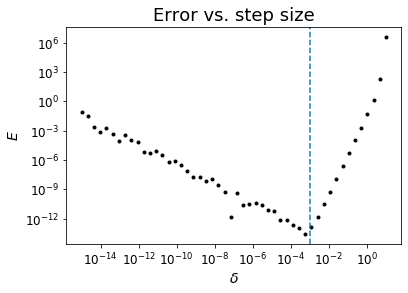

Derivative of exp(0.01 * x) at x=0
  Predicted delta: 0.10238362555396095
  Delta givin minimal error: 0.10985411419875572


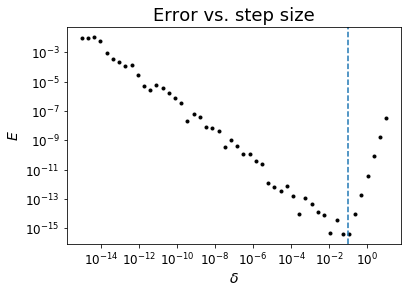

In [3]:
# test at x=0
check_delta(0, 1)
check_delta(0, 0.01)

Derivative of exp(1 * x) at x=100
  Predicted delta: 0.0010238362555396092
  Delta givin minimal error: 0.0025595479226995332


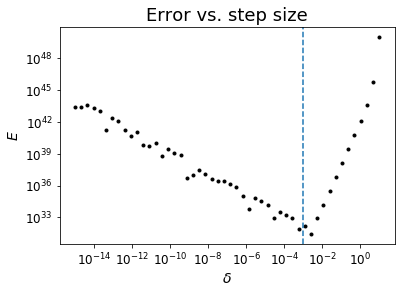

Derivative of exp(0.01 * x) at x=100
  Predicted delta: 0.10238362555396095
  Delta givin minimal error: 0.05179474679231202


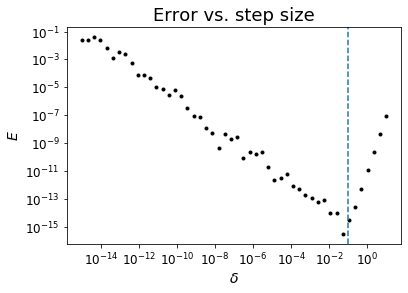

In [4]:
check_delta(100, 1)
check_delta(100, 0.01)

By performing the same tests at $x=0,100$, and $a=1, 0.01$, we see that the predicted $\delta$'s are reasonably close to the value found in the test. Some $\delta$'s are off by a factor of two, which could be due to the truncation error, but the answers are still have the same order of magnitude, which is reasonably close.

## Problem 2